# Overview of Tests
ARMA, ARIMA, Seasonal ARIMA 등 각각의 모델들은 여러 유형의 시계열을 그 근본 속성에 따라 분석함  
그렇기 때문에 분석에 적절한 모델을 선택하려면, 데이터에 대하여 알아야 한다.  
statsmodel 라이브러리에는 시계열의 근본 속성을 분석할 수 있는 다양한 검정 방법들이 존재한다.  
그 중 우리는 두 가지에 대해 알아볼 것이다.  
하나는 시계열이 Stationary인지 아닌지 즉, 시점에 독립적인지를 알아내는 방법과  
다른 하나는 두 시계열이 인과관계에 있는지를 알아보는 방법이다.  

## Tests for Stationarity
시계열이 정상적인지 확인하기 위해서 augmented Dickey-Fuller Test를 사용할 수 있다.  
비정상성을 양적으로 나타내고 싶거나, 수학적 검정을 원할 때 사용하는 방법이다.  
Dickey-Fuller test는 귀무가설 검정을 사용하는데, p값을 반환하여 시계열이 정상인지 비정상인지 수치로 보여줌

### Dickey-Fuller Test
- Dickey-Fuller Test는 전형적인 가설 검정 방식을 사용함
- 이 검정에서 귀무가설($H_0$)은 $\phi=1$이라는 말이며, 이를 단위 검정이라고도 한다.
- 기본적으로 Dickey-Fuller Test는 p값을 반환한다.
    - 즉, p값이 낮으면, 즉 0.05보다 작으면 귀무가설을 기각하고, 해당 데이터셋은 정상이라고 추정함
    - p값이 0.05보다 높으면 귀무가설을 기각할 수 없다.
    
### Granger Causality Tests
- Granger Causality Tests 또한 전형적인 가설 검정 방법
- 하나의 시계열이 다른 시계열을 예측하는 데 유용한지, 즉 인과관계가 있는지를 밝히는 검정이다.
- 시계열 간의 상관관계를 측정하는 것은 쉽다( 단지 하나가 증가하면 다른 하나도 증가(양의 상관관계) / 하나가 올라갈 때 다른 것이 감소(음의 상관관계) )
- 반면 일정한 시간이 흐른 후에 한 시계열에서의 변화가 다른 시계열에서의 변화와 상관 있다는 것을 관찰하려는 것은 완전히 다른 것이다.
    - 한 시계열이 변함에 따라 다른 시계열도 변한다는 것
    - 한 시계열이 다른 시계열의 변화를 야기한다, 즉 그 변화에 인과관계가 있다는 것
- 이 검정은 두 시계열 사이에 인과관계를 나타내는 지표가 있는지 확인하는 데 사용하지만 
- 이 검증에서 강한 인과관계가 있다고 나오더라도 밝혀지지 않은 외부 요인들이 늘 있을 수 있다.
    - 제 3의 요인이 있거나 다른 두 시계열의 원인이 되는 세 번째 시계열 데이터셋이 있을 수 있다. 
    - 그렇다는 것은 돌깁된 두 시계열은 실제로 인과관계가 없다는 것
- 이런 인과관계 검정을 해석하는 데 도메인 지식이 많이 필요함

## Evaluating Forecasts

### AIC
- 정보량 규준 중의 한가지
- AIC는 모델들의 집합을 평가함
- ARIMA 기반의 복잡한 모델을 개발할 때 p, d, q 값의 가중치나 순서를 달리해서 ARIMA 기반 모델을 수없이 돌려야 하는데 AIC는 그러한 모델들을 비교할 수 있다.
- 각 모델의 품질을 다른 모델과 비교하여 추정함
- AIC에서 가장 중요한 점은 과적합을 최대한 방지하기 위해 변수가 몇 개 사용되는지에 따라 페널티를 부여한다는 것
    - 아주 간단하지만 성능이 비교적 좋은 모델과 성능이 약간 더 좋지만 엄청나게 복잡한 모델이 있을 때 성능은 약간 떨어져도 더 간단한 모델을 좋게 평가함
    - 사용되는 변수의 수를 감안한다는 뜻
- 매우 복잡한 모델이지만 성능이 크게 향상되지 않으면 비교적 괜찮은 성능을 보여주는 아주 간단한 모델보다 더 못한 정보량 규준 값을 얻게 된다.  
$\rightarrow$ 이러한 이유로 AIC는 여러 모델을 비교할 때 자주 사용됨 ( 너무 많은 변수를 사용하는 모델에는 페널티 )

### BIC
- 베이즈 정보량 규준
- 베이즈 접근법으로 모델을 비교하는 데 사용되는 수학

<br>

이 두 평가기준은 아래와 같은 함수를 불러옴으로써 계산 가능하다.  
그러나 statsmodel에 내장되어 있기 때문에 단독으로 계산하는 경우는 거의 없다.

&nbsp;&nbsp;&nbsp;&nbsp;<tt>from from statsmodels.tools.eval_measures import aic, bic</tt>
## Seasonality plots
![image](https://user-images.githubusercontent.com/70187490/152164368-f2c08bd5-4976-4f72-b4d4-634666af3baf.png)
- Seasonality plot은 전체 시계열 데이터셋을 파악하기 쉽게 해주고, 각 시기의 전반적인 값들로 plot을 그릴 수 있게 해줌
- 왼쪽 그래프를 보면, 1년 열두 달이 각 시기
    - 6월과 7월 동안 행동에 어떠한 변화가 있는것으로 보이는데 이 시기에는 일반적으로 증가한다고 볼수 있다
    - 이 말은 여름에 계절적 요소들이 있는 편이라고 해석할 수 있다.
- 오른쪽은 분기를 표현하는 Seasonality plot
    - 3분기에 증가하는 경향
    

# Code for Statistics Test
## Perform standard imports and load datasets

In [1]:
import pandas as pd
import numpy as np

# Load a seasonal dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',
                 index_col='Month',
                 parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasnal dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',
                 index_col='Date',
                 parse_dates=True)
df2.index.freq = 'D'

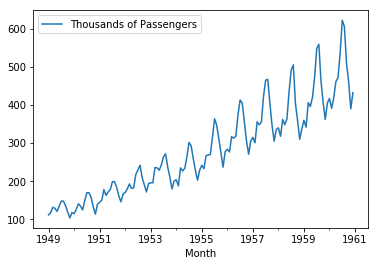

In [2]:
df1.plot();

df1이 plot형태로 보았을 때 계절성과 증가 trend가 있는데 이를 귀무가설로 검정하기 위해 augmented Dickey-Fuller Test를 사용할 것이다.  
이 테스트는 시계열이 정상인지 비정상인지를 알려주며 수치를 통해 양적으로 이 데이터셋이 비정상적일 거라는 것을 보여줄 것이다.

## Tests for Stationarity
시계열 자료가 *stationary*라는 말은 평균과 분산이 같은 거리의 두 점사이에서 동일하다는 뜻이다. 즉, 관찰 결과를 어디에서 가져오든 결과는 동일해야 한다. 계절성을 보여주는 시계열은 *Non-stationary*하다.  
stationary test는 단위근 검정 테스트를 포함한다. 만약 귀무가설 $H_0$가 *Non-stationary*하면 단위근을 포함하고 있다는 뜻이다. 대립 가설 $H_1$은 stationary를 뒷받쳐주는 증거다.  augmented Dickey-Fuller와 Kwiatkowski-Phillips-Schmidt-Shin tests는 이러한 stationarity의 여부를 알게 해주는 검정 방법들이다.

### Augmented Dickey-Fuller Test
Series가 stationary인지 확인하기 위해 Augmented Dickey-Fuller Test를 사용할 수 있다. 이 검정 방법에서 귀무가설은  $\phi=1$(이것은 단위검정이라고 부르기도 한다)이다. 이 테스트는 몇몇 출력값을 return 하는데 가장 중요한 것은 p-value이다. 만약 p-value가 0.05보다 작으면 귀무가설을 기각한다.

In [5]:
from statsmodels.tsa.stattools import adfuller

adfuller(df1['Thousands of Passengers'])  # help(adfuller)를 통해 함수에 대한 더욱 자세한 설명을 볼 수 있다.

(0.8153688792060483,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

adfuller()의 반환값들
- 검정통계량
- p값
- 사용된 시차
- ADF회귀에 사용된 관찰 수
- 임계값

In [8]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])

for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val
    
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

이 report에서 p-value값이 0.99로 매우 큰 값임을 알수 있다.  
이로써 귀무가설을 기각할 수 있게 되며 airline dataset이 stationary하지 않다는 것을 알 수 있다.  

In [19]:
def adf_test(series, title=''):
    """
    series와 title을 전달하여 ADF report를 반환함
    """
    print(f'Augmented Dicky-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
    
    print(out.to_string(), '\n')   # .to_string은 "dtype: float64"의 메세지를 삭제시켜준다.
    
    if result[1] <= 0.05:
        print('귀무가설에 반하는 증거가 확실합니다')
        print('귀무가설을 기각합니다.')
        print('이 데이터에선 단위근이 없으며 정상적입니다.')
    else:
        print('귀무가설을 기각할 증거가 불충분합니다.')
        print('귀무가설을 기각하지 못합니다.')
        print('이 데이터에선 단위근이 있으며 비정상적입니다.')

In [20]:
adf_test(df1['Thousands of Passengers'])

Augmented Dicky-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770 

귀무가설을 기각할 증거가 불충분합니다.
귀무가설을 기각하지 못합니다.
이 데이터에선 단위근이 있으며 비정상적입니다.


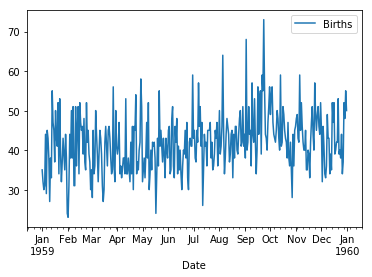

In [21]:
df2.plot();

df2의 그래프에선 이 plot이 정상적인지 아닌지 구분히기 어렵다. 분명한 추세가 없어서 정상적이라고 할수 있으나 계절성이 있을 수도 있다. 하지만 잡음이 많아서 구분하기가 쉽지 않다. 

In [22]:
adf_test(df2['Births'])

Augmented Dicky-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089 

귀무가설에 반하는 증거가 확실합니다
귀무가설을 기각합니다.
이 데이터에선 단위근이 없으며 정상적입니다.


### Granger Causality Test
Granger Causality Tests는 한 시계열이 다른 시계열을 예측하는 데 유용한지 여부를 확인하기 위한 가설 검정이다. 시계열 간의 상관관계를 측정하는 것은 쉽지만 일정한 시간 후에 한 시리즈가 다른 시리즈와 상관관계가 있는 변화를 관찰하는 것은 또 다른 일이다. 이는 첫 번째 시계열의 변화가 두 번째 시계열의 행동에 영향을 미쳤다는 인과관계의 존재를 나타낼 수 있다. 그러나 이러한 변화가 두 시계열의 상호관계가 아닌 다른 세 번째 요인에 의해 영향을 받는 것일수도 있다. 그럼에도 한 계열의 변화가 다른 계열의 다가오는 변화를 예측할 수 있다면, 인과관계가 있든 없든 유용할 수 있다.  

<br>
Granger Causality Test에서의 귀무가설은 lag된 값 $x$가 $y$의 변화를 설명하지 않는다는 것이다. 다시 말해 $x_t$는 $y_t$를 야기하는 Granger case가 아니라고 가정한다.

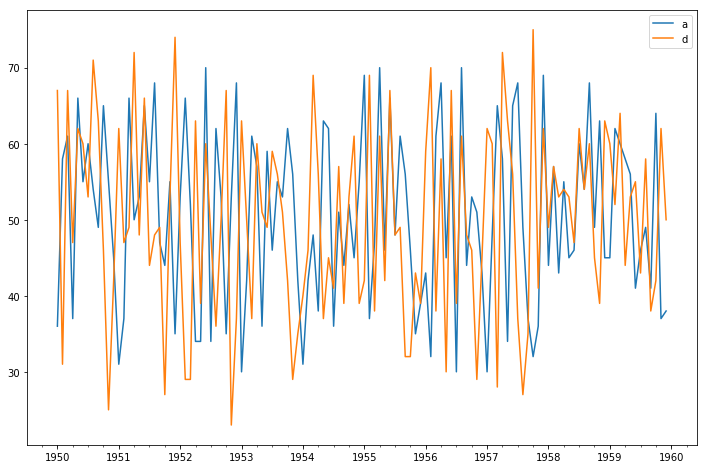

In [25]:
df3 = pd.read_csv('../Data/samples.csv',
                 index_col=0,
                 parse_dates=True)
df3.index.freq='MS'
df3[['a', 'd']].plot(figsize=(12, 8));

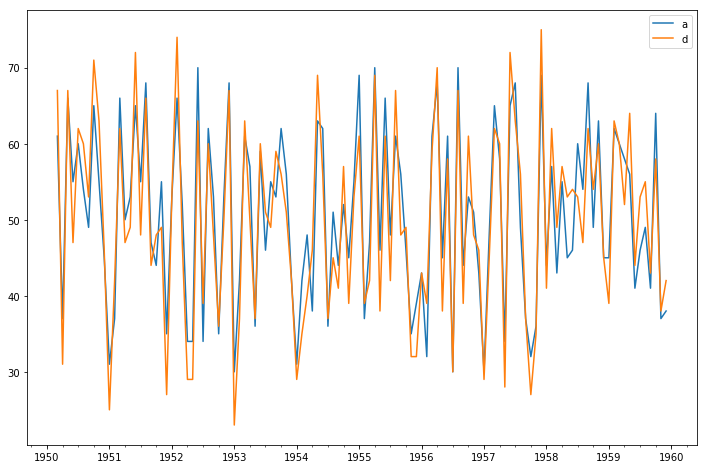

In [28]:
df3['a'].iloc[2:].plot(figsize=(12, 8), legend=True)
df3['d'].shift(2).plot(legend=True);

a와 d는 연관성이 있다.  
이 말은 d에 어떤 변화가 있고 이틀 후, a에 그 변화가 반영된 것으로 보인다.  
d가 a의 원인이라는 증거가 되거나 두 시계열 사이에 인과관계가 있다고 말할 수 있다.  
이렇게 plot을 잘 이동해보면, 두 시계열 사이의 실제 관련성을 볼수도 있지만 plot을 얼마나 이동해야 하는지 알수 없다.  
그것을 알더라도 관련성이 분명하게 보이기는 쉽지 않을 수도 있다.  
$\rightarrow$ Granger Causality Tests가 이 문제를 해결할 수 있다.

In [35]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df3[['a', 'd']], maxlag=3); # maxlag 값이 클수록 인과관계 검정을 계산하는데 쓰는 시간은 더 많이 소요됨


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [36]:
grangercausalitytests(df3[['b', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


## Evaluating forecast accuracy
Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

The formula for the mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

The formula for the root mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

The advantage of the RMSE is that it is expressed in the same units as the data.<br><br>

A method similar to the RMSE is the <a href='https://en.wikipedia.org/wiki/Mean_absolute_error'><strong>mean absolute error</strong></a> (MAE) which is the mean of the magnitudes of the error, given as<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;$MAE = {\frac 1 L} \sum\limits_{l=1}^L \mid{y_{T+l}} - \hat y_{T+l}\mid$<br><br>

A forecast method that minimizes the MAE will lead to forecasts of the median, while minimizing the RMSE will lead to forecasts of the mean.

In [38]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20, 30, (50,2)), columns=['test', 'predictions'])
df.head()

,test,predictions
0,26,23
1,27,24
2,26,29
3,22,26
4,27,24


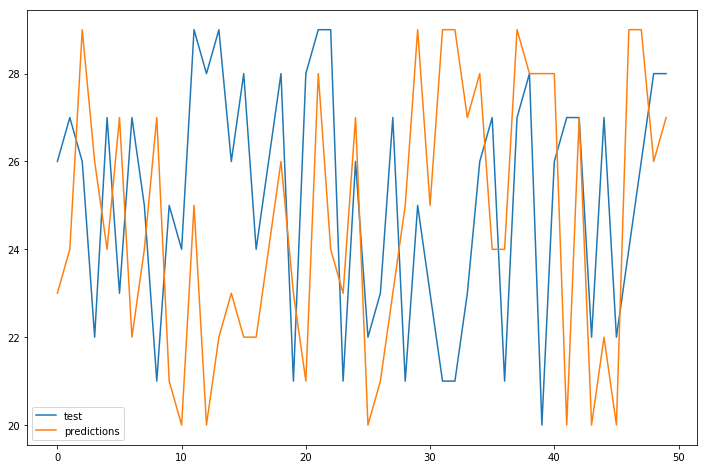

In [39]:
df.plot(figsize=(12, 8));

In [42]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

rmse(df['test'], df['predictions'])

4.125530268947253

# Exposing Seasonality with Month and Quarter Plots

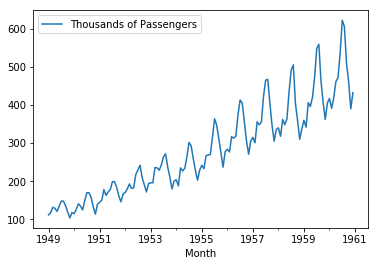

In [43]:
df = pd.read_csv('../Data/airline_passengers.csv',
                index_col='Month',
                parse_dates=True)
df.index.freq = 'MS'
df.plot();

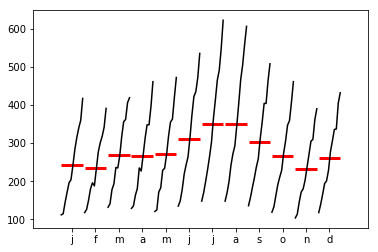

In [45]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

month_plot(df['Thousands of Passengers']);
# month_plot은 월마다의 관찰값들의 범위와 평균을 표시해준다.

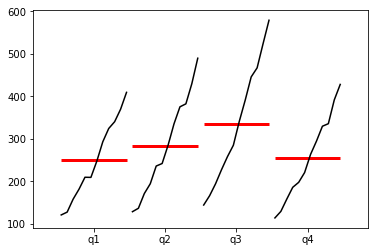

In [47]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);
# 일반적으로 3분기에 여행을 많이 가는 것으로 보임